In [2]:
import numpy as np
import pandas as pd

In [3]:
from google.colab import files
files.upload()

Saving kaggle (3).json to kaggle (3).json


{'kaggle (3).json': b'{"username":"ayush07120","key":"5c03b1ab499c7f25db0448e1969ee7e8"}'}

In [49]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [50]:
!kaggle datasets download -d salader/dogs-vs-cats --force


Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 98% 1.04G/1.06G [00:08<00:00, 299MB/s]
100% 1.06G/1.06G [00:08<00:00, 134MB/s]


In [51]:
!unzip -q dogs-vs-cats.zip -d dogs_vs_cats


replace dogs_vs_cats/dogs_vs_cats/test/cats/cat.10.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: dogs_cat_classifier_using_augmentation
error:  invalid response [dogs_cat_]
replace dogs_vs_cats/dogs_vs_cats/test/cats/cat.10.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: error:  invalid response [classifie]
replace dogs_vs_cats/dogs_vs_cats/test/cats/cat.10.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: new name: replace dogs_vs_cats/dogs_vs_cats/test/cats/cat.10000.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [52]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.applications.vgg16 import VGG16
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization

In [46]:
# ek sath sare data pe kam karna is not possible
# due to large data, and we have not that much storage

# so we use Generators---> for creating batch of our data

In [53]:
conv_base = VGG16(
    weights = 'imagenet',
    include_top = False,

    # Last Dense layer ko hata ke sirf conv_layers in pre-trained model me import kar rhe hai

    input_shape=(150,150,3)
)

In [54]:
conv_base.summary()

# see there is no dense layer

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 150, 150, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 150, 150, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 75, 75, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 75, 75, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 37, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 37, 37, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 18, 18, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 18, 18, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 9, 9, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

# Building model

In [55]:
model = Sequential()

In [56]:
# add pre-trained model in our model---> jisme only conv_layer hai
model.add(conv_base)
model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))


In [57]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,812,353 (64.13 MB)

 Trainable params: 16,812,353 (64.13 MB)

 Non-trainable params: 0 (0.00 B)

# Now frezz the conv_layer training

In [58]:
conv_base.trainable = False

In [59]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,812,353 (64.13 MB)

 Trainable params: 2,097,665 (8.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [60]:
# generators

train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/dogs_vs_cats/train',
    labels= 'inferred',
    label_mode ='int',
    batch_size =32,
    image_size=(150,150)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/dogs_vs_cats/test',
    labels= 'inferred',
    label_mode ='int',
    batch_size =32,
    image_size=(150,150) # resize the size becouse har image ka size diffirent hai
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [61]:
# each image store as numpy array
# but the size of array is 0 to 255
# so we want to normalize it

def process(image,label):
  image = tf.cast(image/255. , tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds= validation_ds.map(process)

In [62]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [63]:
history = model.fit(train_ds,epochs=5,validation_data=validation_ds)

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 92s 132ms/step - accuracy: 0.8440 - loss: 0.3811 - val_accuracy: 0.9092 - val_loss: 0.2180
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 79s 126ms/step - accuracy: 0.9166 - loss: 0.2050 - val_accuracy: 0.9170 - val_loss: 0.2011
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 79s 126ms/step - accuracy: 0.9289 - loss: 0.1712 - val_accuracy: 0.9172 - val_loss: 0.2104
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 79s 126ms/step - accuracy: 0.9395 - loss: 0.1487 - val_accuracy: 0.9164 - val_loss: 0.2150
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 79s 126ms/step - accuracy: 0.9519 - loss: 0.1206 - val_accuracy: 0.9108 - val_loss: 0.2496


In [64]:
import matplotlib.pyplot as plt

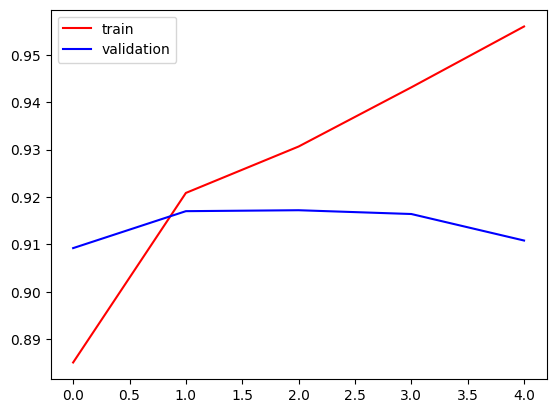

In [65]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()

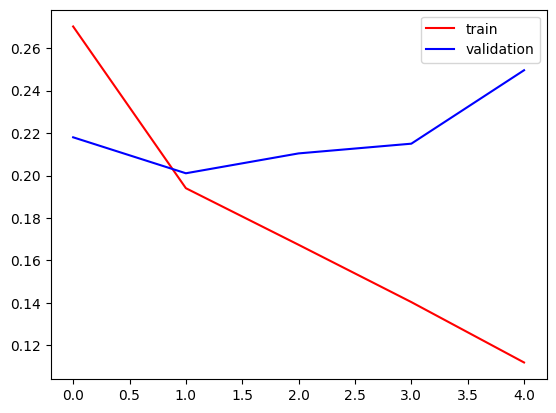

In [66]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()

# Applying DAta Augmentation

In [67]:
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [69]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip = True,
    width_shift_range=0.2
)

test_datagen = ImageDataGenerator(rescale=1./255)

In [70]:
train_generator = train_datagen.flow_from_directory(
    '/content/dogs_vs_cats/train',
    target_size=(150,150),
    batch_size =32,
    class_mode ='binary'
)

validation_generator = train_datagen.flow_from_directory(
    '/content/dogs_vs_cats/test',
    target_size=(150,150),
    batch_size =32,
    class_mode ='binary'
)

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [71]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [73]:
history1 = model.fit(
    train_generator,
    epochs=5,
    validation_data = validation_generator
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 184s 290ms/step - accuracy: 0.8796 - loss: 0.2810 - val_accuracy: 0.8800 - val_loss: 0.2677
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 246s 394ms/step - accuracy: 0.8980 - loss: 0.2367 - val_accuracy: 0.8816 - val_loss: 0.2905
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 189s 302ms/step - accuracy: 0.8993 - loss: 0.2274 - val_accuracy: 0.8994 - val_loss: 0.2405
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 201s 321ms/step - accuracy: 0.9061 - loss: 0.2230 - val_accuracy: 0.8992 - val_loss: 0.2331
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 189s 303ms/step - accuracy: 0.9131 - loss: 0.2091 - val_accuracy: 0.9022 - val_loss: 0.2294


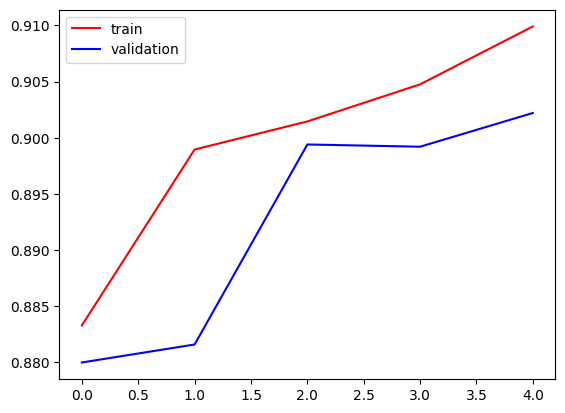

In [74]:
plt.plot(history1.history['accuracy'],color='red',label='train')
plt.plot(history1.history['val_accuracy'],color='blue',label='validation')
plt.legend()

# applying fine

In [75]:
conv_base = VGG16(
    weights = 'imagenet',
    include_top = False,
    input_shape=(150,150,3)
)

In [76]:
# add pre-trained model in our model---> jisme only conv_layer hai
model = Sequential()

model.add(conv_base)
model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,812,353 (64.13 MB)

 Trainable params: 16,812,353 (64.13 MB)

 Non-trainable params: 0 (0.00 B)

In [78]:
conv_base.trainable = True

set_trainable = False

for layer in conv_base.layers:

  # train only 5th layer of conv_layer

  if layer.name == 'block5_conv1':
    set_trainable = True

  if set_trainable:
    layer.trainable = True

  else :
    layer.trainble = False

for layer in conv_base.layers:
  print(layer.name,layer.trainable)

input_layer_6 True
block1_conv1 True
block1_conv2 True
block1_pool True
block2_conv1 True
block2_conv2 True
block2_pool True
block3_conv1 True
block3_conv2 True
block3_conv3 True
block3_pool True
block4_conv1 True
block4_conv2 True
block4_conv3 True
block4_pool True
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_pool True


In [ ]:
model.summary()

In [ ]:
# generators

train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/dogs_vs_cats/train',
    labels= 'inferred',
    label_mode ='int',
    batch_size =32,
    image_size=(150,150)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/dogs_vs_cats/test',
    labels= 'inferred',
    label_mode ='int',
    batch_size =32,
    image_size=(150,150) # resize the size becouse har image ka size diffirent hai
)

In [ ]:
# each image store as numpy array
# but the size of array is 0 to 255
# so we want to normalize it

def process(image,label):
  image = tf.cast(image/255. , tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds= validation_ds.map(process)

In [ ]:
# when use RMSprop ---> use very low learning rate
optimizer=keras.optimizer.RMSprop(lr = 1e-5)

model.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])
history1 = model.fit(train_ds,epochs=5,validation_data=validation_ds)